In [27]:
!pip install nsepy

In [28]:
from nsepy import get_history
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Moving Average for both the stocks - monthly and Quarterly


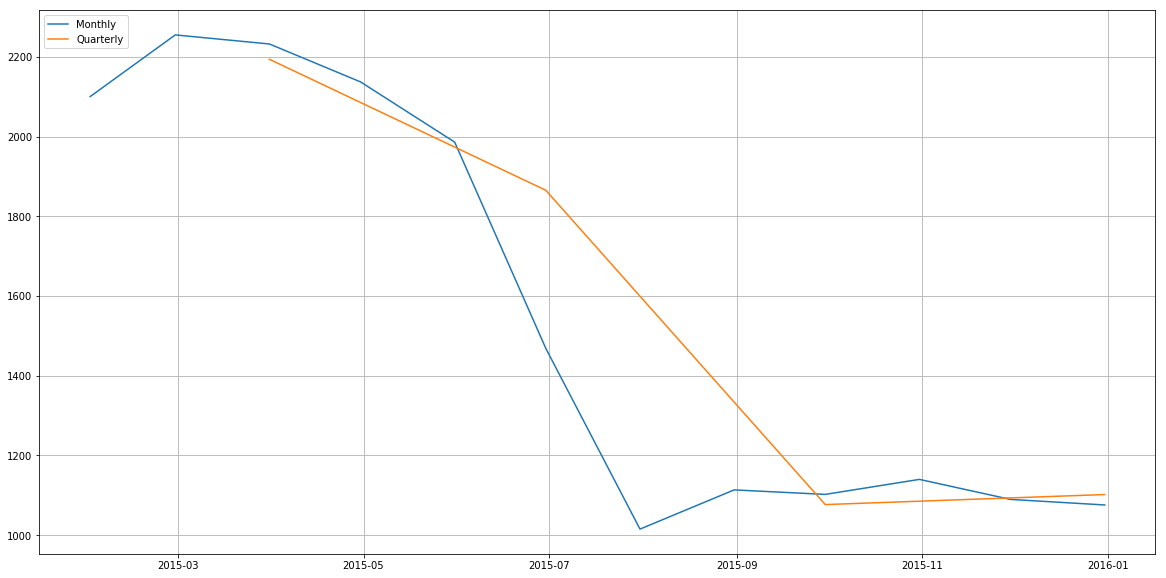

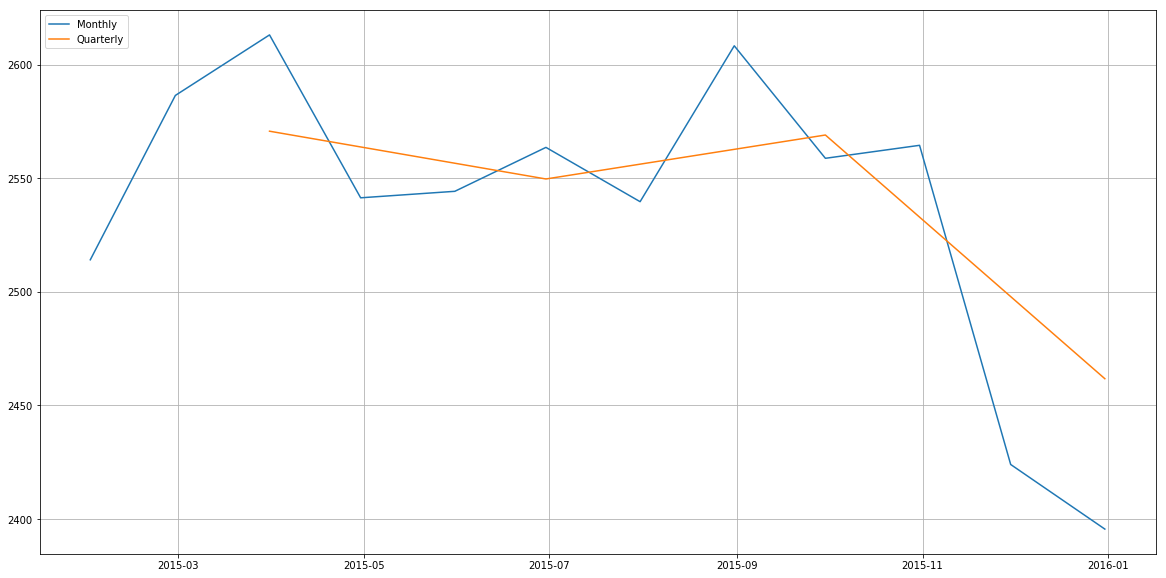

In [29]:
data_INFY = get_history (symbol='INFY',start= date(2015,1,1),end=date(2015,12,31))
data_TCS = get_history (symbol='TCS',start= date(2015,1,1),end=date(2015,12,31))
def my_plot (yo):
    
    #only taking the close data.
    close = pd.DataFrame(yo['Close'])
    
    #filling in the missing dates and filling the values of close on weekends as the same as on Friday.
    close_complete = close.asfreq('D', method = 'pad')
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(close_complete.Close.resample('M').mean(),label='Monthly')
    plt.plot(close_complete.Close.resample('Q').mean(),label='Quarterly')
    plt.legend(loc=2)
    
    
my_plot (data_INFY)
my_plot (data_TCS)

### Rolling Window

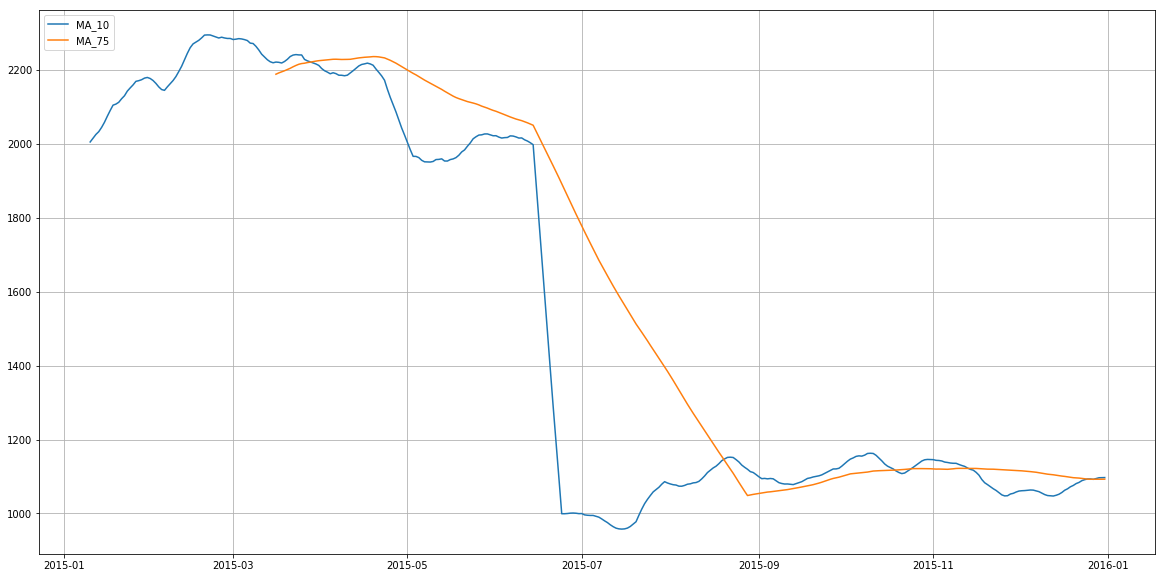

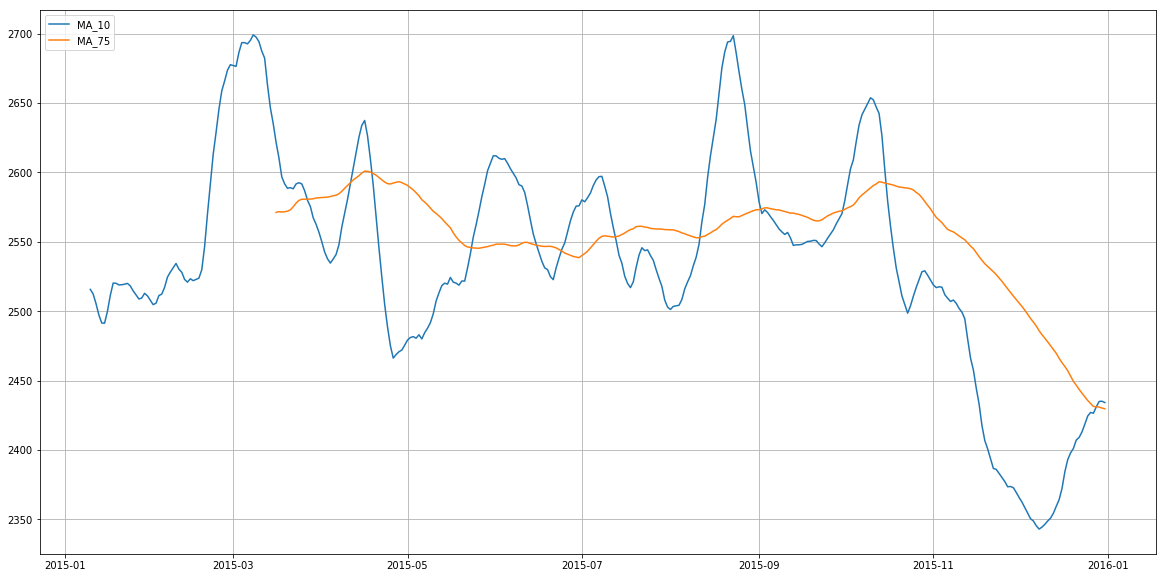

In [30]:
def my_plot2 (yo):
    
    #only taking the close data.
    close = pd.DataFrame(yo['Close'])
    
    #filling in the missing dates and filling the values of close on weekends as the same as on Friday.
    close_complete = close.asfreq('D', method = 'pad')
    close_complete['MA_10'] = close_complete.Close.rolling(10).mean()
    close_complete['MA_75'] = close_complete.Close.rolling(75).mean()
    
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(close_complete['MA_10'],label='MA_10')
    plt.plot(close_complete['MA_75'],label='MA_75')
    plt.legend(loc=2)

my_plot2(data_INFY)    
my_plot2(data_TCS)

### Volume Shock

In [31]:
#checking the number of rows as few will be missing due to holidays
data_TCS.shape

(248, 14)

In [32]:
#Volume shock function

def Volumeshock(stock) :
    stock['Volume_shocks']='NaN'
    stock['direction_of_Volume_shock']='NaN'
    for idx in range (0,247):
        if ((stock.Volume[idx+1]-stock.Volume[idx])*100)/stock.Volume[idx]<10 and ((stock.Volume[idx+1]-stock.Volume[idx])*100)/stock.Volume[idx]>-10:
            stock.Volume_shocks[idx+1]='0'
        else:
            stock.Volume_shocks[idx+1]='1'
    for idx in range (0,247):
        if ((stock.Volume[idx+1]-stock.Volume[idx])*100)/stock.Volume[idx]<0:
            stock.direction_of_Volume_shock[idx+1]='0'
        else:
            stock.direction_of_Volume_shock[idx+1]='1'

In [33]:
Volumeshock(data_TCS)
data_TCS.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykern

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock
Date,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,1
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,1
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,1
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,1


In [34]:
Volumeshock(data_INFY)
data_INFY.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykern

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock
Date,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,1
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,1
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,0


### Price shock

In [35]:
#price shock function

def Priceshock(stock) :
    stock['Price_shock']='NaN'
    stock['direction_of_price_shock']='NaN'
    for i in range (0,247):
        if ((stock.Close[i+1]-stock.Close[i])*100)/stock.Close[i]<2 and ((stock.Close[i+1]-stock.Close[i])*100)/stock.Close[i]>-2:
            stock.Price_shock[i]='0'
        else:
            stock.Price_shock[i]='1'
    for i in range (0,247):
        if ((stock.Close[i+1]-stock.Close[i])*100)/stock.Close[i]<0:
            stock.direction_of_price_shock[i]='0'
        else:
            stock.direction_of_price_shock[i]='1'

In [36]:
Priceshock(data_TCS)
data_TCS.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykern

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock
Date,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,0,1
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,1,0,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,1,1,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,1,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,1,0,1


In [37]:
Priceshock(data_INFY)
data_INFY.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykern

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock
Date,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,0,1
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,1,0,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,1,1,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,0,0,1
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,0,0,1


### Only price shock 

In [38]:
#Only price shock function

def Onlypriceshock(stock):
    stock['Only_price_shock']='NaN'
    for idx in range (0,247):
        if stock.Price_shock[idx]=='1' and stock.Volume_shocks[idx]=='0':
            stock.Only_price_shock[idx]='1'
        else :
            stock.Only_price_shock[idx]='0'

In [39]:
Onlypriceshock(data_TCS)
data_TCS.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock,Only_price_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,0,1,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,1,1,0,0,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,1,1,1,0,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,1,1,0,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,0,1,0,1,0


In [40]:
Onlypriceshock(data_INFY)
data_INFY.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock,Only_price_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,0,1,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1,1,0,0,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1,1,1,0,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,0,0,0,1,0
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1,0,0,1,0


# DATA VISUALIZATION

# Time series in simple blue color

In [41]:
from bokeh.plotting import figure, output_notebook, show
def close_plot (stock) :
    p = figure(plot_width=400, plot_height=400)
    p.line(stock.index,stock['Close'], line_width=2) 
    show(p)

In [42]:
close_plot(data_TCS)

In [43]:
close_plot(data_INFY)

### Timeseries between two volume shocks

In [44]:
# For timeseries plot of close prices of stocks/indices with the following features-Color timeseries between two volume shocks. 
#I have understood from the question that close values series when volume shocks have occured is asked. Hence i have written the code accordingly

In [45]:
data_TCS['Volume_shocks'].value_counts()

1      204
0       43
NaN      1
Name: Volume_shocks, dtype: int64

In [46]:
data_new=pd.DataFrame({'newdate':np.arange(1,204,1),'newclose':np.arange(1,204,1)})
j=0
for i in range(0,247):
    if data_TCS.Volume_shocks[i]=='1':
        data_new.newdate[j]=data_TCS.index[i]
        data_new.newclose[j]=data_TCS.Close[i]
        j=j+1
p = figure(plot_width=400, plot_height=400)
p.line(data_new['newdate'],data_new['newclose'], line_width=2,color='red') 
show(p)

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
data_INFY['Volume_shocks'].value_counts()

1      205
0       42
NaN      1
Name: Volume_shocks, dtype: int64

In [48]:
data_new=pd.DataFrame({'newdate':np.arange(1,205,1),'newclose':np.arange(1,205,1)})
j=0
for i in range(0,247):
    if data_INFY.Volume_shocks[i]=='1':
        data_new.newdate[j]=data_INFY.index[i]
        data_new.newclose[j]=data_INFY.Close[i]
        j=j+1
p = figure(plot_width=400, plot_height=400)
p.line(data_new['newdate'],data_new['newclose'], line_width=2,color='red') 
show(p)

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Mark closing Pricing shock without volume shock

In [49]:
# similarly for the next question i have understood from the question that close values series at only price shock is asked.

In [50]:
data_TCS['Only_price_shock'].value_counts()

0      242
1        5
NaN      1
Name: Only_price_shock, dtype: int64

In [51]:
data_new=pd.DataFrame({'newdate':np.arange(1,6,1),'newclose':np.arange(1,6,1)})
j=0
for i in range(0,247):
    if data_TCS.Only_price_shock[i]=='1':
        data_new.newdate[j]=data_TCS.index[i]
        data_new.newclose[j]=data_TCS.Close[i]
        j=j+1
p = figure(plot_width=400, plot_height=400)
p.square(data_new['newdate'],data_new['newclose'], line_width=2,color='red') 
show(p)

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
data_INFY['Only_price_shock'].value_counts()

0      235
1       12
NaN      1
Name: Only_price_shock, dtype: int64

In [53]:
data_new=pd.DataFrame({'newdate':np.arange(1,13,1),'newclose':np.arange(1,13,1)})
j=0
for i in range(0,247):
    if data_INFY.Only_price_shock[i]=='1':
        data_new.newdate[j]=data_INFY.index[i]
        data_new.newclose[j]=data_INFY.Close[i]
        j=j+1
p = figure(plot_width=400, plot_height=400)
p.square(data_new['newdate'],data_new['newclose'], line_width=2,color='red') 
show(p)

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Data Modelling

In [54]:
data_TCS.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.988997,0.967226,0.958217,0.927133,0.929458,0.956762,0.085041,0.144288,0.135333,0.090266,-0.022029
Open,0.988997,1.000000,0.973327,0.967063,0.935876,0.938159,0.964030,0.081819,0.141756,0.148377,0.093203,-0.006370
High,0.967226,0.973327,1.000000,0.972931,0.974147,0.975010,0.989789,0.105912,0.168352,0.168177,0.112097,-0.027028
Low,0.958217,0.967063,0.972931,1.000000,0.977593,0.980559,0.989708,-0.010665,0.051854,0.056924,0.010501,0.001016
Last,0.927133,0.935876,0.974147,0.977593,1.000000,0.998138,0.989350,0.016544,0.078958,0.082673,0.031752,-0.023269
Close,0.929458,0.938159,0.975010,0.980559,0.998138,1.000000,0.991189,0.015533,0.078246,0.080853,0.028472,-0.025826
VWAP,0.956762,0.964030,0.989789,0.989708,0.989350,0.991189,1.000000,0.031504,0.094736,0.099728,0.045007,-0.014863
Volume,0.085041,0.081819,0.105912,-0.010665,0.016544,0.015533,0.031504,1.000000,0.997560,0.779254,0.951965,0.181437
Turnover,0.144288,0.141756,0.168352,0.051854,0.078958,0.078246,0.094736,0.997560,1.000000,0.782894,0.952583,0.185529
Trades,0.135333,0.148377,0.168177,0.056924,0.082673,0.080853,0.099728,0.779254,0.782894,1.000000,0.742013,0.201487


### checking the correlation of open with previous day data

In [63]:
# from above it is understood that high, low, last and VWAP values are having good correlation with open.
# hence checking the correlation of open with previous day values of same parameters.
def func(stock) :
    for i in range(0,247) :
        stock['prev_high']=stock['High'].shift(periods=1,axis=0)
        stock.prev_high[0]=0
        stock['prev_low'] =stock['Low'].shift(periods=1,axis=0)
        stock.prev_low[0]=0
        stock['prev_last']=stock['Last'].shift(periods=1,axis=0)
        stock.prev_last[0]=0
        stock['prev_VWAP']=stock['VWAP'].shift(periods=1,axis=0)
        stock.prev_VWAP[0]=0
func(data_TCS)
data_TCS.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarni

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock,Only_price_shock,prev_high,prev_low,prev_last,prev_VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,0.2883,NaN,NaN,0,1,0,0.00,0.00,0.00,0.00
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,0.6683,1,1,0,0,0,2567.00,2541.00,2550.00,2548.51
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,0.5207,1,1,1,0,0,2590.95,2550.60,2588.40,2568.19
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,0.5894,1,1,0,0,0,2599.90,2524.65,2538.10,2563.94
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,0.6724,0,1,0,1,0,2529.10,2440.00,2450.05,2466.90


In [56]:
func(data_INFY)
data_INFY.head()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,%Deliverble,Volume_shocks,direction_of_Volume_shock,Price_shock,direction_of_price_shock,Only_price_shock,prev_high,prev_low,prev_last,prev_VWAP
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,0.5154,NaN,NaN,0,1,0,0.00,0.0,0.00,0.00
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,0.7371,1,1,0,0,0,1982.00,1956.9,1971.00,1971.34
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,0.7370,1,1,1,0,0,2019.05,1972.0,2017.95,2003.25
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,0.7332,0,0,0,1,0,2030.00,1977.5,1996.00,2004.59
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,0.7270,1,0,0,1,0,1985.00,1934.1,1965.10,1954.82


In [57]:
data_TCS.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,prev_high,prev_low,prev_last,prev_VWAP
Prev Close,1.000000,0.988997,0.967226,0.958217,0.927133,0.929458,0.956762,0.085041,0.144288,0.135333,0.090266,-0.022029,0.459912,0.437647,0.459268,0.455720
Open,0.988997,1.000000,0.973327,0.967063,0.935876,0.938159,0.964030,0.081819,0.141756,0.148377,0.093203,-0.006370,0.454236,0.429821,0.452169,0.448433
High,0.967226,0.973327,1.000000,0.972931,0.974147,0.975010,0.989789,0.105912,0.168352,0.168177,0.112097,-0.027028,0.458611,0.432280,0.456271,0.452307
Low,0.958217,0.967063,0.972931,1.000000,0.977593,0.980559,0.989708,-0.010665,0.051854,0.056924,0.010501,0.001016,0.432738,0.414187,0.435986,0.430937
Last,0.927133,0.935876,0.974147,0.977593,1.000000,0.998138,0.989350,0.016544,0.078958,0.082673,0.031752,-0.023269,0.428880,0.408550,0.431529,0.426094
Close,0.929458,0.938159,0.975010,0.980559,0.998138,1.000000,0.991189,0.015533,0.078246,0.080853,0.028472,-0.025826,0.432840,0.411977,0.435526,0.429958
VWAP,0.956762,0.964030,0.989789,0.989708,0.989350,0.991189,1.000000,0.031504,0.094736,0.099728,0.045007,-0.014863,0.445892,0.423744,0.446919,0.442178
Volume,0.085041,0.081819,0.105912,-0.010665,0.016544,0.015533,0.031504,1.000000,0.997560,0.779254,0.951965,0.181437,0.155770,0.129630,0.130819,0.138027
Turnover,0.144288,0.141756,0.168352,0.051854,0.078958,0.078246,0.094736,0.997560,1.000000,0.782894,0.952583,0.185529,0.184096,0.156282,0.159059,0.166016
Trades,0.135333,0.148377,0.168177,0.056924,0.082673,0.080853,0.099728,0.779254,0.782894,1.000000,0.742013,0.201487,0.207486,0.180029,0.180038,0.191407


In [60]:
def func_svm(stock):
    from sklearn import svm
    features = ['Prev Close','prev_high','prev_low','prev_last','prev_VWAP']
    X = stock[features]
    y = stock['Open']
    print(X.shape)
    print(y.shape)
    reg = svm.SVR()
    reg.fit(X, y) 
func_svm(data_TCS)
func_svm(data_INFY)

(248, 5)
(248,)
(248, 5)
(248,)


C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rupesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
def func_lr(stock):
    from sklearn.linear_model import LinearRegression
    features = ['Prev Close','prev_high','prev_low','prev_last','prev_VWAP']
    X = stock[features]
    y = stock['Open']
    reg = LinearRegression().fit(X, y)
func_lr(data_TCS)
func_lr(data_INFY)

In [64]:
''''models are made what ever we want to predict we will use the below code place it under the model and run it
X_predict = []  
y_predict = model.predict(X_predict)'''

"'models are made what ever we want to predict we will use the below code place it under the model and run it\nX_predict = []  \ny_predict = model.predict(X_predict)"